# Blog Post Series - AI Fairness 360: Mitigating Bias in Machine Learning Models

## Part 2: Implementing Bias Mitigation Techniques with AI Fairness 360


### Introduction



Welcome back to our blog series on AI Fairness 360! In Part 1, we explored the foundational concepts of bias in AI and demonstrated how to create dataset objects and evaluate fairness metrics using IBM's AI Fairness 360 toolkit. Understanding and detecting bias in machine learning models is crucial, but the next step is equally important: mitigating this bias to ensure fair and equitable AI systems.

In this second installment, we will delve into various bias mitigation techniques provided by AI Fairness 360. These techniques are designed to address bias at different stages of the machine learning pipeline, from pre-processing the data to post-processing the model's predictions. By implementing these techniques, we can reduce bias and improve the fairness of our AI models, ultimately leading to more ethical and responsible AI applications.



### Learning Objectives

By the end of this blog post, you will be able to:
- Understand different bias mitigation techniques available in AI Fairness 360.
- Implement pre-processing, in-processing, and post-processing bias mitigation algorithms.
- Evaluate the effectiveness of these techniques using fairness metrics.



### Prerequisites

Before diving into the content, make sure you have:
- A basic understanding of AI Fairness 360 and its dataset objects, as covered in Part 1.
- Familiarity with Python and machine learning concepts.

In this post, we will provide step-by-step guides and code snippets to help you implement and understand these bias mitigation techniques. Let's get started on the journey to making our AI models more fair and equitable!



# **Overview of Bias Mitigation Techniques**



Bias mitigation is an essential step in developing fair and ethical AI systems. AI Fairness 360 offers various techniques to reduce bias at different stages of the machine learning pipeline. These techniques can be broadly categorized into three types: pre-processing, in-processing, and post-processing.

#### **A) Pre-Processing Techniques**

Pre-processing techniques aim to modify the training data to reduce bias before the model is trained. By addressing bias in the dataset, these methods ensure that the model learns from a more balanced and fair representation of the data.

- **Reweighing**: This technique assigns different weights to the examples in the training data based on the protected attributes to ensure that the model gives equal importance to all groups.
- **Optimized Preprocessing**: This technique transforms the dataset to remove bias while preserving the relationships between features and the target variable.

#### **B) In-Processing Techniques**

In-processing techniques modify the learning algorithm itself to reduce bias during model training. These methods integrate fairness considerations directly into the training process.

- **Adversarial Debiasing**: This technique uses adversarial learning to minimize bias. It trains the model to make accurate predictions while an adversary tries to detect bias based on the protected attributes.
- **Prejudice Remover**: This technique adds a regularization term to the learning algorithm's objective function to penalize biased outcomes, promoting fairness during training.

#### **C) Post-Processing Techniques**

Post-processing techniques adjust the predictions of a trained model to reduce bias. These methods are applied after the model has been trained and focus on modifying the model’s outputs to ensure fairness.

- **Equalized Odds Post-Processing**: This technique adjusts the model's predictions to achieve equalized odds, ensuring that the false positive and false negative rates are the same across different groups.
- **Calibrated Equalized Odds Post-Processing**: This technique combines calibration with equalized odds to adjust the model's predictions, maintaining both fairness and accuracy.

In the following sections, we will provide step-by-step guides to implement these techniques using AI Fairness 360. By understanding and applying these methods, you can develop AI models that are not only accurate but also fair and unbiased.



## **A) Implementing Pre-Processing Techniques**



Pre-processing techniques modify the training data to mitigate bias before the model is trained. These methods ensure that the model learns from a more balanced and fair dataset. In this section, we will focus on the Reweighing technique.

### **Step-by-Step Guide: Reweighing Technique**

The Reweighing technique assigns different weights to the examples in the training data based on the protected attributes to ensure that the model gives equal importance to all groups.



#### 1. Load the Dataset and Convert to AIF360 Dataset Object

First, we need to load the dataset and convert it into an AIF360 dataset object. We'll use the same Recidivism dataset from Part 1.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Impute NaNs with most frequent value
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Import BinaryLabelDataset
from aif360.datasets import BinaryLabelDataset

# Enable pandas dataframe output
from sklearn import set_config
set_config(transform_output='pandas')


pd.set_option("display.max_columns", 100)

# Load the data 
df = pd.read_csv("data/Iowa_Prison_Recidivism_Status_20240724.csv", 
                 index_col=0, usecols=range(0, 23-7))   

## Quick Conversion of Dtypes for Clean Data
df = df.convert_dtypes(convert_string=False)

# Drop unnecessary columns
drop_cols = ['Supervising Unit','Supervision Start Date','Supervision End Date'] + [c for c in df.columns if 'Year' in c]
df = df.drop(columns=drop_cols)
df.info()

# Encode the 'race' column as binary white or non-white.
race_map = {'White': 0, 'Black': 1, 'Hispanic': 1, 'Asian or Pacific Islander': 1,
            'American Indian or Alaska Native': 1, 'Unknown': 1, 'Other':1}
df['Race'] = df['Race'].map(race_map)

# Encode the "Sex" column
sex_map = {"Male": 0, "Female":1}
df['Sex'] = df['Sex'].map(sex_map)


df.head()



<class 'pandas.core.frame.DataFrame'>
Index: 25244 entries, 20655350 to 20999813
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Race                         25244 non-null  object 
 1   Sex                          25241 non-null  object 
 2   Age                          25244 non-null  Int64  
 3   Supervision Type             25244 non-null  object 
 4   Months Supervised            25244 non-null  Int64  
 5   Supervision End Reason       25244 non-null  object 
 6   Supervision Offense Class    25244 non-null  object 
 7   Supervision Offense Type     25244 non-null  object 
 8   Supervision Offense Subtype  25244 non-null  object 
 9   Reincarcerated               25244 non-null  boolean
dtypes: Int64(2), boolean(1), object(7)
memory usage: 2.0+ MB


,Race,Sex,Age,Supervision Type,Months Supervised,Supervision End Reason,Supervision Offense Class,Supervision Offense Type,Supervision Offense Subtype,Reincarcerated
Offender Number,,,,,,,,,,
20655350,0,0.0,35,Prison,125,Discharged - Expiration of Sentence,B Felony,Violent,Sex,False
18876932,1,0.0,30,Prison,49,Released to Special Sentence,D Felony,Other,Other Criminal,False
2424146,0,0.0,40,Prison,8,Parole Granted,Aggravated Misdemeanor,Public Order,Other Public Order,False
19088303,1,0.0,29,Work Release,2,Parole Granted,C Felony,Drug,Trafficking,False
20280797,0,0.0,38,Prison,11,Paroled w/Immediate Discharge,Aggravated Misdemeanor,Property,Burglary,False


In [2]:

## Create the Preprocessor
# Categorical Pipeline
cat_cols = df.select_dtypes(include='object').columns
cat_imputer = SimpleImputer(strategy='most_frequent')
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
cat_pipe = make_pipeline(cat_imputer, ohe)


# Numeric Pipeline
num_cols = df.select_dtypes(include='number').columns
num_imputer = SimpleImputer(strategy='mean')
num_pipe = make_pipeline(num_imputer)



# Convert Boolean Columns to Integers
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)



# Create the column Transformer
preprocessor = ColumnTransformer(transformers=[('cat', cat_pipe, cat_cols),
                                               ('num', num_pipe, num_cols)],
                                 remainder='passthrough',
                                 verbose_feature_names_out=False)

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Supervision Type', 'Supervision End Reason',
       'Supervision Offense Class', 'Supervision Offense Type',
       'Supervision Offense Subtype'],
      dtype='object')),
                                ('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['Race', 'Sex', 'Age', 'Months Supervised'], dtype='object'))],
                  verbose_feature_names_out=False)

### Choice: Dataset First or Train-Test-Split First

Traditionally, we would perform our train-test-split before applying the preprocessig steps in order to avoid data leakage between the train and test sets.  However, the BinaryLabelDataset has a convenient built-in `.split()` method for creating training and test datasets.

#### Dataset First 

In [3]:
# Preprocess the entire dataset
# Assuming df is your DataFrame
final_df = preprocessor.fit_transform(df)
final_df.head()

,Supervision Type_Prison,Supervision Type_Work Release,Supervision End Reason_Discharged - Expiration of Sentence,Supervision End Reason_Parole Granted,Supervision End Reason_Paroled to Detainer - INS,Supervision End Reason_Paroled to Detainer - Iowa,Supervision End Reason_Paroled to Detainer - Out of State,Supervision End Reason_Paroled to Detainer - U.S. Marshall,Supervision End Reason_Paroled w/Immediate Discharge,Supervision End Reason_Released to Special Sentence,Supervision Offense Class_A Felony,Supervision Offense Class_Aggravated Misdemeanor,Supervision Offense Class_B Felony,Supervision Offense Class_C Felony,Supervision Offense Class_D Felony,Supervision Offense Class_Felony - Enhancement to Original Penalty,Supervision Offense Class_Felony - Mandatory Minimum,Supervision Offense Class_Other Felony,Supervision Offense Class_Serious Misdemeanor,Supervision Offense Class_Simple Misdemeanor,Supervision Offense Class_Special Sentence 2005,Supervision Offense Type_Drug,Supervision Offense Type_Other,Supervision Offense Type_Property,Supervision Offense Type_Public Order,Supervision Offense Type_Violent,Supervision Offense Subtype_Alcohol,Supervision Offense Subtype_Animals,Supervision Offense Subtype_Arson,Supervision Offense Subtype_Assault,Supervision Offense Subtype_Burglary,Supervision Offense Subtype_Drug Possession,Supervision Offense Subtype_Flight/Escape,Supervision Offense Subtype_Forgery/Fraud,Supervision Offense Subtype_Kidnap,Supervision Offense Subtype_Murder/Manslaughter,Supervision Offense Subtype_OWI,Supervision Offense Subtype_Other Criminal,Supervision Offense Subtype_Other Drug,Supervision Offense Subtype_Other Government,Supervision Offense Subtype_Other Public Order,Supervision Offense Subtype_Other Violent,Supervision Offense Subtype_Prostitution/Pimping,Supervision Offense Subtype_Robbery,Supervision Offense Subtype_Sex,Supervision Offense Subtype_Stolen Property,Supervision Offense Subtype_Theft,Supervision Offense Subtype_Traffic,Supervision Offense Subtype_Trafficking,Supervision Offense Subtype_Vandalism,Supervision Offense Subtype_Weapons,Race,Sex,Age,Months Supervised,Reincarcerated
Offender Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20655350,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,125.0,0
18876932,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,30.0,49.0,0
2424146,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,8.0,0
19088303,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,29.0,2.0,0
20280797,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,11.0,0


In [4]:

# Convert to BinaryLabelDataset
dataset = BinaryLabelDataset(
    favorable_label=0, # Not reincarcerated
    unfavorable_label=1, # Reincarcerated
    df=final_df,
    label_names=['Reincarcerated'],
    # protected_attribute_names=['Race',"Sex"]
    protected_attribute_names = ["Sex"]

)

# Split the dataset
train, test = dataset.split([0.7], shuffle=True)

We can confirm the size of the splits by checking the length of the labels in train vs. test.

In [5]:
len(train.labels), len(test.labels)

(17670, 7574)

However, this approach can cause data leakage, since the test set was preprocessed using information from the training set. To avoid this, we an use a traditional train-test-split first and then construct the train and test datasets manually from the split data.

#### Traditional Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split

# Conventional train-test split
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Preprocess the training set
train_df = preprocessor.fit_transform(train_df)

# Preprocess the test set
test_df = preprocessor.transform(test_df)  # Example preprocessing step

train_df.head()

,Supervision Type_Prison,Supervision Type_Work Release,Supervision End Reason_Discharged - Expiration of Sentence,Supervision End Reason_Parole Granted,Supervision End Reason_Paroled to Detainer - INS,Supervision End Reason_Paroled to Detainer - Iowa,Supervision End Reason_Paroled to Detainer - Out of State,Supervision End Reason_Paroled to Detainer - U.S. Marshall,Supervision End Reason_Paroled w/Immediate Discharge,Supervision End Reason_Released to Special Sentence,Supervision Offense Class_A Felony,Supervision Offense Class_Aggravated Misdemeanor,Supervision Offense Class_B Felony,Supervision Offense Class_C Felony,Supervision Offense Class_D Felony,Supervision Offense Class_Felony - Enhancement to Original Penalty,Supervision Offense Class_Felony - Mandatory Minimum,Supervision Offense Class_Other Felony,Supervision Offense Class_Serious Misdemeanor,Supervision Offense Class_Simple Misdemeanor,Supervision Offense Class_Special Sentence 2005,Supervision Offense Type_Drug,Supervision Offense Type_Other,Supervision Offense Type_Property,Supervision Offense Type_Public Order,Supervision Offense Type_Violent,Supervision Offense Subtype_Alcohol,Supervision Offense Subtype_Animals,Supervision Offense Subtype_Arson,Supervision Offense Subtype_Assault,Supervision Offense Subtype_Burglary,Supervision Offense Subtype_Drug Possession,Supervision Offense Subtype_Flight/Escape,Supervision Offense Subtype_Forgery/Fraud,Supervision Offense Subtype_Kidnap,Supervision Offense Subtype_Murder/Manslaughter,Supervision Offense Subtype_OWI,Supervision Offense Subtype_Other Criminal,Supervision Offense Subtype_Other Drug,Supervision Offense Subtype_Other Government,Supervision Offense Subtype_Other Public Order,Supervision Offense Subtype_Other Violent,Supervision Offense Subtype_Prostitution/Pimping,Supervision Offense Subtype_Robbery,Supervision Offense Subtype_Sex,Supervision Offense Subtype_Stolen Property,Supervision Offense Subtype_Theft,Supervision Offense Subtype_Traffic,Supervision Offense Subtype_Trafficking,Supervision Offense Subtype_Vandalism,Supervision Offense Subtype_Weapons,Race,Sex,Age,Months Supervised,Reincarcerated
Offender Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
614774,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,236.0,0
19154684,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,32.0,4.0,0
19189433,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,27.0,7.0,0
147731,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,50.0,3.0,0
19234385,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,31.0,4.0,1


In [7]:

# Convert to BinaryLabelDatasets
train = BinaryLabelDataset(
    favorable_label=0, # Not reincarcerated
    unfavorable_label=1, # Reincarcerated
    df=train_df,
    label_names=['Reincarcerated'],
    # protected_attribute_names=['Race',"Sex"]
    protected_attribute_names = ["Sex"]
)

test = BinaryLabelDataset(
    favorable_label=0,
    unfavorable_label=1,
    df=test_df,
    label_names=['Reincarcerated'],
    # protected_attribute_names=['Race',"Sex"]
    protected_attribute_names = ["Sex"]

)

len(train.labels), len(test.labels)

(17670, 7574)

####

We will use the traditional train-test-split method to split the dataset into training and testing sets. Many of the official AIF360 examples use pre-constructed datasets and do not acknowledge the data leakage issue.

### Assessing Model Bias 

Before we implement the reweighed dataset, let' create a baseline model without bias mitigation and examine its fairness metrics.

##### Baseline Model (No mitigation applied)

In [58]:

def evaluate_model(y_true, y_pred, output_dict=False, results_label=''):
    """
    Evaluate the performance of a classification model by calculating classification metrics and displaying a confusion matrix.

    Parameters:
    - y_true (array-like): The true labels.
    - y_pred (array-like): The predicted labels.
    - output_dict (bool, optional): Whether to return the classification report as a dictionary. Default is False.
    - results_label (str, optional): A label to identify the results. Default is an empty string.

    Returns:
    - If output_dict is True, a dictionary containing the classification report and the results label.
    """
    print(f"Classification Metrics: {results_label}\n\n")

    print(classification_report(y_true, y_pred))
    ax = ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize='true',cmap='Greens',
                                            display_labels=['Non-Recid','Recid'])
    ax = plt.gca()
    ax.set_title(f"Confusion Matrix: {results_label}")
    plt.show()
    
    if output_dict==True:
        report = classification_report(y_true, y_pred, output_dict=True)
        report['Label'] = results_label
        return report


Classification Metrics: Unmitigated Model


              precision    recall  f1-score   support

         0.0       0.74      0.57      0.64      4738
         1.0       0.48      0.67      0.56      2836

    accuracy                           0.61      7574
   macro avg       0.61      0.62      0.60      7574
weighted avg       0.64      0.61      0.61      7574



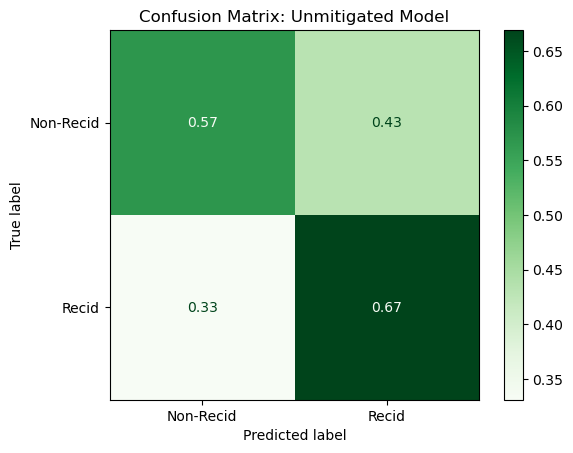

In [64]:
from sklearn.linear_model import LogisticRegression

# Extract features and labels from the reweighed dataset
X_train = train.features
y_train = train.labels.ravel()

X_test = test.features
y_test = test.labels.ravel()

# Train the model
model =  LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
eval_unmit = evaluate_model(y_test, model.predict(X_test), results_label='Unmitigated Model', output_dict=True) 

We can see that we have an overall accuracy of 61%, however, when examining the recall scores we can see that the model is more confident in predicting reincarnation(recid) than Non-Recidivism.

### Fairness Metrics - Model Predictions

Evaluating the fairness of a machine learning model is crucial to ensure that the model does not exhibit bias towards any particular group. AI Fairness 360 provides the `ClassificationMetric` class, which offers a variety of fairness metrics to assess the performance of your models. In this section, we'll define key fairness metrics and demonstrate how to calculate them using AI Fairness 360.



In order to use it, we must have a dataset of true values and a dataset of predicted values. Therefore, we will make a copy of the test dataset before overwriting the `.labels` 

In [10]:
type(test)

aif360.datasets.binary_label_dataset.BinaryLabelDataset

In [11]:
from aif360.metrics import ClassificationMetric
from aif360.explainers import MetricTextExplainer

# Get predictions
y_pred = model.predict(X_test)

# Create a new dataset with predictions
test_pred = test.copy()
test_pred.labels = y_pred


# Define privileged and unprivileged groups
privileged_groups = [{'Sex': 0}]  # Male
unprivileged_groups = [{'Sex': 1}]  # Female/Other


# Evaluate fairness
metric = ClassificationMetric(
    test,
    test_pred,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

explainer = MetricTextExplainer(metric)

/opt/homebrew/Caskroom/miniforge/base/envs/fair-env/lib/python3.12/site-packages/torch/_functorch/deprecated.py:61: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.vmap is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.vmap instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecated('vmap', 'torch.vmap')




#### **Key Fairness Metrics**

1. **Disparate Impact**: Measures the ratio of the favorable outcome rates between the unprivileged and privileged groups. 

   $$
   \text{Disparate Impact} = \frac{\text{P(y=1|unprivileged)}}{\text{P(y=1|privileged)}}
   $$


- A value close to 1 indicates fairness.
- A value less than 1 indicates bias toward predicting positive outcomes for the privileged class.
- A value greater than 1 indicates bias towards the unpriviledged class.


In [12]:
# Disparate Impact
disparate_impact = metric.disparate_impact()
print(f"Disparate Impact: {disparate_impact:.2f}")

print(explainer.disparate_impact())

Disparate Impact: 1.56
Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 1.5575745625603374


We can see that, with a value of 1.56, which is significantly than 1, indicating that our baseline model is biased towards predicting a favorable outcome for the unprivileged class.


2. **Statistical Parity Difference**: The difference in the probability of favorable outcomes between the unprivileged and privileged groups. 

   $$
   \text{Statistical Parity Difference} = \text{P(y=1|unprivileged)} - \text{P(y=1|privileged)}
   $$
   
- Value close to 0 indicates fairness.
- Negative Value indicates that the unprivileged group has a lower probability of receiving positive outcomes compared to the privileged group.
- Positive Value indicates the privileged group has a lower probability of receiving positive outcomes compare to the unprivileged group.

In [13]:
# Statistical Parity Difference
statistical_parity_difference = metric.statistical_parity_difference()
print(f"Statistical Parity Difference: {statistical_parity_difference:.2f}")

print(explainer.statistical_parity_difference())

Statistical Parity Difference: 0.25
Statistical parity difference (probability of favorable outcome for unprivileged instances - probability of favorable outcome for privileged instances): 0.24767723324582192


We can see that unprivileged classes are 4% less likely to be predicted to receive a positive predictio than the privileged class.


3. **Equal Opportunity Difference**: The difference in the true positive rates between the unprivileged and privileged groups. 



   $$
   \text{Equal Opportunity Difference} = \text{TPR(unprivileged)} - \text{TPR(privileged)}
   $$
   
-	Value Close to 0: A value close to 0 suggests that the model has similar true positive rates for both groups, indicating fairness in terms of equal opportunity.

-	Positive Value: A positive Equal Opportunity Difference indicates that the unprivileged group has a higher true positive rate compared to the privileged group.
-	Negative Value: A negative Equal Opportunity Difference indicates that the unprivileged group has a lower true positive rate compared to the privileged group.

In [14]:
# Equal Opportunity Difference
equal_opportunity_difference = metric.equal_opportunity_difference()
print(f"Equal Opportunity Difference: {equal_opportunity_difference:.2f}")

print(explainer.equal_opportunity_difference())

Equal Opportunity Difference: 0.19
True positive rate difference (true positive rate on unprivileged instances - true positive rate on privileged instances): 0.19284858787621217



4. **Average Odds Difference**: The average difference in false positive rates and true positive rates between the unprivileged and privileged groups. 


   $$
   \text{Average Odds Difference} = \frac{1}{2}[(\text{FPR(unprivileged)} - \text{FPR(privileged)}) + (\text{TPR(unprivileged)} - \text{TPR(privileged)})]
   $$

- Value Close to 0: A value close to 0 suggests that the model’s error rates and correct prediction rates are similar for both groups, indicating fairness in terms of both positive and negative outcomes.
- Positive Value: A positive Average Odds Difference indicates that the unprivileged group has higher error rates (FPR) and/or higher correct prediction rates (TPR) compared to the privileged group.
- Negative Value: A negative Average Odds Difference indicates that the unprivileged group has lower error rates (FPR) and/or lower correct prediction rates (TPR) compared to the privileged group.

In [15]:
# Average Odds Difference
average_odds_difference = metric.average_odds_difference()
print(f"Average Odds Difference: {average_odds_difference:.2f}")

print(explainer.average_odds_difference())

Average Odds Difference: 0.25
Average odds difference (average of TPR difference and FPR difference, 0 = equality of odds): 0.25029379501431104



##### **Metric Interpretation - Rules of Thumb**

| Metric                        | Definition                                                                                       | Interpretation                                                                                       | Threshold for Significant Bias                        | Bias Directionality                                            |
|-------------------------------|--------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|--------------------------------------------------------|------------------------------------------------------------------|
| **Disparate Impact**          | Ratio of favorable outcomes between unprivileged and privileged groups.                          | 1 implies perfect fairness.                                                                         | < 0.8 or > 1.25                                         | < 0.8: Against unprivileged<br> > 1.25: Against privileged       |
| **Statistical Parity Difference** | Difference in probability of favorable outcomes between unprivileged and privileged groups.     | 0 indicates similar favorable outcomes for both groups.                                              | < -0.1 or > 0.1                                         | < 0: Against unprivileged<br> > 0: Against privileged            |
| **Equal Opportunity Difference** | Difference in true positive rates between unprivileged and privileged groups.                   | 0 suggests equal positive prediction rates for both groups.                                          | < -0.1 or > 0.1                                         | < 0: Against unprivileged<br> > 0: Against privileged            |
| **Average Odds Difference**   | Average difference in false positive and true positive rates between unprivileged and privileged groups. | 0 indicates similar error rates across both groups.                                                 | < -0.1 or > 0.1                                         | < 0: Against unprivileged<br> > 0: Against privileged            |

By calculating these fairness metrics, we can assess the performance and fairness of our baseline logistic regression model. In the next section, we will apply the Reweighing technique to mitigate bias in the dataset and re-evaluate these metrics to observe the improvements in fairness.


In [35]:
privileged_groups

[{'Sex': 0}]

### Putting it All Together

In [36]:
from aif360.metrics import ClassificationMetric

def evaluate_fairness(test, y_pred, unprivileged_groups, privileged_groups,
                      verbose=True, output_dict=False, convert_to_dataset=True, 
                      results_label=""):
    """
    Evaluates the fairness of a machine learning model's predictions.

    Parameters:
    - test (Dataset): The test dataset used for evaluation.
    - y_pred (array-like): The predicted labels for the test dataset.
    - unprivileged_groups (list of dicts): The unprivileged groups for fairness evaluation. e.g.,[{'Sex': 1}]
    - privileged_groups (list of dicts): The privileged groups for fairness evaluation.e.g., [{'Sex': 0}]
    - verbose (bool, optional): Whether to print the fairness metrics. Defaults to True.
    - output_dict (bool, optional): Whether to return the fairness metrics as a dictionary. Defaults to False.
    - convert_to_dataset (bool, optional): Whether to convert the test dataset to a new dataset with predictions. Defaults to True.
    - results_label (str, optional): A label for the fairness metrics. Defaults to "". Also used as value for "Label" key in results dict.

    Returns:
    - metrics_dict (dict, optional): A dictionary containing the fairness metrics if output_dict is True.

    """
    # Create a new dataset with predictions
    if convert_to_dataset:
        test_pred = test.copy()
        test_pred.labels = y_pred
    else:
        test_pred = y_pred

    # Evaluate fairness
    metric = ClassificationMetric(
        test,
        test_pred,
        unprivileged_groups=unprivileged_groups,
        privileged_groups=privileged_groups
    )
    
    print(f"Fairness Metrics: {results_label}")
    
    metrics_dict = {
        "Disparate Impact": metric.disparate_impact(),
        "Statistical Parity Difference": metric.statistical_parity_difference(),
        "Equal Opportunity Difference": metric.equal_opportunity_difference(),
        "Average Odds Difference": metric.average_odds_difference()
    }
    
    if verbose:
        # Print metrics dict one by one
        for k, v in metrics_dict.items():
            print(f"- {k}: {v:.2f}")
        
    if output_dict:
        metrics_dict['Label'] = results_label
        return metrics_dict

#### Putting it all together - Baseline Model


Classification Metrics: Logistic Regression -  Unmitigated


              precision    recall  f1-score   support

         0.0       0.74      0.57      0.64      4738
         1.0       0.48      0.67      0.56      2836

    accuracy                           0.61      7574
   macro avg       0.61      0.62      0.60      7574
weighted avg       0.64      0.61      0.61      7574



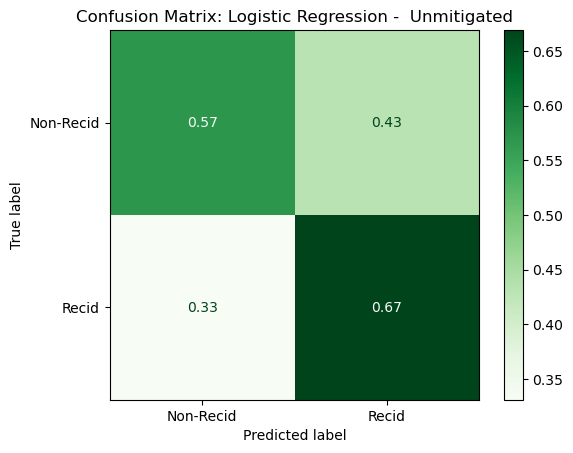

Fairness Metrics: Logistic Regression -  Unmitigated
- Disparate Impact: 1.56
- Statistical Parity Difference: 0.25
- Equal Opportunity Difference: 0.19
- Average Odds Difference: 0.25


In [72]:
# Extract features and labels from the reweighed dataset
X_train = train.features
y_train = train.labels.ravel()

X_test = test.features
y_test = test.labels.ravel()

# Train the model
model =  LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Ealuate model performance
label = "Logistic Regression -  Unmitigated"
evaluate_model(y_test, model.predict(X_test), results_label=label)


# Define privileged and unprivileged groups
privileged_groups = [{'Sex': 0}]  # White
unprivileged_groups = [{'Sex': 1}]  # Non-White


# Evaluate model fairness
fairness_unmit = evaluate_fairness(test, model.predict(X_test), unprivileged_groups, privileged_groups,
                            verbose=True, output_dict=True, results_label=label)

##### Interpreting Our Baseline Model's Fairness


According to our rules of thumb:
- A Disparate Impact of 1.56 suggests significance bias against the privileged class.
- A Statistical Parity Difference of 0.25 indicates significant bias against the privileged class.
- An Equal Opportunity Difference of 0.19 indicated a significant bias against against the privileged class.
- An average odds difference of 0.25 indicate a significant bias against the priviledged class. 




### 2. Apply the Reweighing Algorithm to Address Bias



Next, we apply the Reweighing algorithm to the dataset. This will create a new dataset with weights assigned to each example to ensure fair representation.

`CONFIRM:` We can only mitigate the bias for one protected attribute at a time.


In part 1, we found that the dataset was more biased in terms of Sex than Race, so we will use Sex for our examples in this blog post. 

In [18]:
from aif360.algorithms.preprocessing import Reweighing

# Define privileged and unprivileged groups
privileged_groups = [{'Sex': 0}]  # White
unprivileged_groups = [{'Sex': 1}]  # Non-White

# Apply Reweighing
RW = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
reweighed_train = RW.fit_transform(train)
reweighed_test = RW.transform(test)


We have now updated the values stored in the datasets under the `.instance_weights` methods based on the bias in the specified protected attribute.

In [19]:
# Comparing original vs. reweighed training datasets
display(train.instance_weights[:5])
reweighed_train.instance_weights[:5]

array([1., 1., 1., 1., 1.])

array([1.01838057, 0.90648459, 1.01838057, 1.01838057, 0.97094552])

We can see that the weights have been adjusted to account for the bias in the training dataset.

#### 3. Train a Machine Learning Model

Using the reweighed dataset, we train a machine learning model. For simplicity, we'll use a logistic regression model. We will take advantage of the `sample_weight` argument in the `.fit()` method of the model to pass in the calculated weights.



##### Applying Reweighed Features

Classification Metrics: Logistic Regression - Reweighed


              precision    recall  f1-score   support

         0.0       0.75      0.55      0.64      4738
         1.0       0.48      0.69      0.56      2836

    accuracy                           0.60      7574
   macro avg       0.61      0.62      0.60      7574
weighted avg       0.65      0.60      0.61      7574



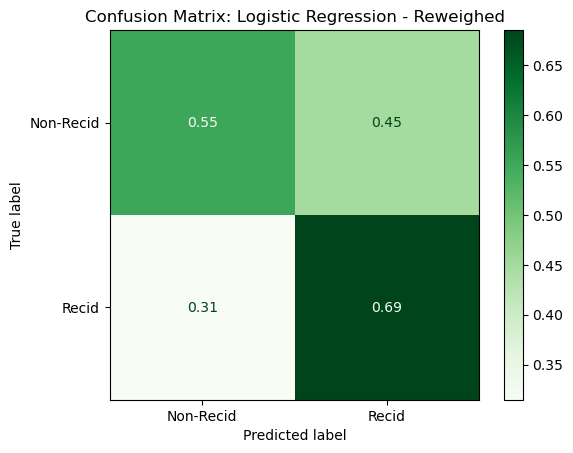

In [62]:

# Extract features and labels from the reweighed dataset
X_train = reweighed_train.features
y_train = reweighed_train.labels.ravel()
# Extracting the reweighed sample weights
sample_weight = reweighed_train.instance_weights


X_test = reweighed_test.features
y_test = reweighed_test.labels.ravel()

# Train the model
label="Logistic Regression - Reweighed"
model =  LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
model.fit(X_train, y_train, sample_weight=sample_weight)
eval_reweigh = evaluate_model(y_test, model.predict(X_test), results_label=label, output_dict=True)





**4. Evaluate the Model Using Fairness Metrics**

Finally, we evaluate the model's performance and fairness using AIF360's metrics.


In [63]:

fairness_reweigh = evaluate_fairness(reweighed_test, model.predict(X_test), unprivileged_groups, privileged_groups,
                  results_label=label, output_dict=True)

Fairness Metrics: Logistic Regression - Reweighed
- Disparate Impact: 0.88
- Statistical Parity Difference: -0.06
- Equal Opportunity Difference: -0.06
- Average Odds Difference: -0.05


| Metric                        | Definition                                                                                       | Interpretation                                                                                       | Threshold for Significant Bias                        | Bias Directionality                                            |
|-------------------------------|--------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|--------------------------------------------------------|------------------------------------------------------------------|
| **Disparate Impact**          | Ratio of favorable outcomes between unprivileged and privileged groups.                          | 1 implies perfect fairness.                                                                         | < 0.8 or > 1.25                                         | < 0.8: Against unprivileged<br> > 1.25: Against privileged       |
| **Statistical Parity Difference** | Difference in probability of favorable outcomes between unprivileged and privileged groups.     | 0 indicates similar favorable outcomes for both groups.                                              | < -0.1 or > 0.1                                         | < 0: Against unprivileged<br> > 0: Against privileged            |
| **Equal Opportunity Difference** | Difference in true positive rates between unprivileged and privileged groups.                   | 0 suggests equal positive prediction rates for both groups.                                          | < -0.1 or > 0.1                                         | < 0: Against unprivileged<br> > 0: Against privileged            |
| **Average Odds Difference**   | Average difference in false positive and true positive rates between unprivileged and privileged groups. | 0 indicates similar error rates across both groups.                                                 | < -0.1 or > 0.1                                         | < 0: Against unprivileged<br> > 0: Against privileged            |

After reweighing:
- Disparate impact is 0.88, which is above the 0.8 threshold, indicating that there is no significant bias.
- Statistical Parity Difference is -0.06, which is within the < -0.1 threshold, indicating no significant bias.
- Equal Opportunity Difference is -0.06, which is within the threshold, indicating no significant bias.
- Average Odds Difference is -0.05, whic is within the threshold, indicating no significant bias. 

Applying Reweighing was sufficient to eliminate the bias of our baseline model.


This example demonstrates how to apply the Reweighing technique to mitigate bias in your dataset before training a model. By ensuring fair representation in the training data, you can develop more equitable AI systems.

In the next section, we will explore in-processing techniques to mitigate bias during the training phase. Stay tuned!



## **B) Implementing In-Processing Techniques**



In-processing techniques modify the learning algorithm itself to reduce bias during model training. These methods integrate fairness considerations directly into the training process. In this section, we will focus on the Adversarial Debiasing algorithm.



### **Adversarial Debiasing**



Adversarial Debiasing uses adversarial learning to minimize bias. It trains the model to make accurate predictions while an adversary tries to detect bias based on the protected attributes. The goal is to improve the fairness of the model by making it difficult for the adversary to distinguish between different protected groups.




**3. Apply the Adversarial Debiasing Algorithm**

Next, we apply the Adversarial Debiasing algorithm to train the model.

>Note regarding Variable Scope Reuse: 
The tf.compat.v1.variable_scope is set with reuse=tf.compat.v1.AUTO_REUSE, allowing the reuse of variables within the same scope. This prevents the ValueError related to existing variables.



In [22]:

from aif360.algorithms.inprocessing import AdversarialDebiasing
import tensorflow as tf


# Ensure compatibility with TensorFlow 2.x
tf.compat.v1.disable_eager_execution()

# Define the adversarial debiasing model
sess = tf.compat.v1.Session()
with tf.compat.v1.variable_scope('debiasing', reuse=tf.compat.v1.AUTO_REUSE):

    adversarial_debiasing = AdversarialDebiasing(
        privileged_groups=privileged_groups,
        unprivileged_groups=unprivileged_groups,
        scope_name='debiasing',
        debias=True,
        sess=sess,
    )

# Train the model
adversarial_debiasing.fit(train)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2024-07-31 11:49:31.380083: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


epoch 0; iter: 0; batch classifier loss: 1.309947; batch adversarial loss: 0.575142
epoch 1; iter: 0; batch classifier loss: 0.863003; batch adversarial loss: 0.604165
epoch 2; iter: 0; batch classifier loss: 0.864426; batch adversarial loss: 0.578406
epoch 3; iter: 0; batch classifier loss: 1.094357; batch adversarial loss: 0.514122
epoch 4; iter: 0; batch classifier loss: 0.929809; batch adversarial loss: 0.584156
epoch 5; iter: 0; batch classifier loss: 0.764115; batch adversarial loss: 0.534181
epoch 6; iter: 0; batch classifier loss: 0.663445; batch adversarial loss: 0.488920
epoch 7; iter: 0; batch classifier loss: 0.665789; batch adversarial loss: 0.465806
epoch 8; iter: 0; batch classifier loss: 0.667862; batch adversarial loss: 0.439062
epoch 9; iter: 0; batch classifier loss: 0.651263; batch adversarial loss: 0.476961
epoch 10; iter: 0; batch classifier loss: 0.603030; batch adversarial loss: 0.446793
epoch 11; iter: 0; batch classifier loss: 0.604646; batch adversarial loss:


**4. Make Predictions and Create Predicted Dataset**

Make predictions on the test set using the trained Adversarial Debiasing model.


Classification Metrics: Adversarial Debiasing


              precision    recall  f1-score   support

         0.0       0.67      0.87      0.76      4738
         1.0       0.57      0.28      0.38      2836

    accuracy                           0.65      7574
   macro avg       0.62      0.58      0.57      7574
weighted avg       0.63      0.65      0.62      7574



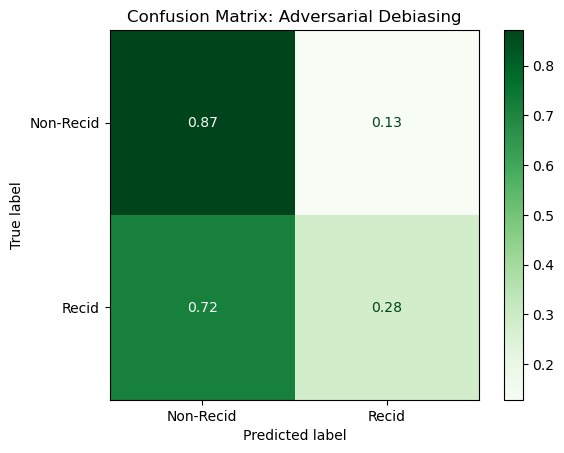

In [66]:

# Make predictions on the test set
pred_dataset = adversarial_debiasing.predict(test)

# Convert predictions to labels
y_pred = pred_dataset.labels

label = "Adversarial Debiasing"
eval_adv_debias = evaluate_model(test.labels, pred_dataset.labels, results_label=label, output_dict=True)


**5. Evaluate the Model Using Fairness Metrics**

Finally, we evaluate the model's performance and fairness using AIF360's metrics.


In [67]:
fairness_adv_debias =  evaluate_fairness(test, pred_dataset, unprivileged_groups, privileged_groups,
                                         convert_to_dataset=False, output_dict=True, results_label=label)

Fairness Metrics: Adversarial Debiasing
- Disparate Impact: 1.26
- Statistical Parity Difference: 0.20
- Equal Opportunity Difference: 0.14
- Average Odds Difference: 0.22


We can see that in-progressing with the Adversarial Debiasing Algorithm was not sufficient to reduce the bias to non-significant values.

## C) Implementing Post-Processing Techniques



Post-processing techniques adjust the predictions of a trained model to reduce bias. These methods are applied after the model has been trained and focus on modifying the model’s outputs to ensure fairness. In this section, we will focus on the Equalized Odds Post-Processing algorithm.



### Equalized Odds Post-Processing



The Equalized Odds Post-Processing algorithm adjusts the model’s predictions to ensure that the false positive rate and true positive rate are equal across different groups. This technique ensures that the model’s performance is consistent for both the privileged and unprivileged groups.

Step-by-Step Guide: Equalized Odds Post-Processing

1. Train a Baseline Machine Learning Model

We have already trained a baseline logistic regression model and created the train and test datasets.




2. Make Predictions on the Test Set

Make predictions on the test set using the trained model.


In [25]:
# Get predictions for test set and convert to dataset object

y_pred = model.predict(X_test)



3. Convert Predictions to AIF360 BinaryLabelDataset

Convert the test set and predictions into AIF360 BinaryLabelDataset objects.

In [26]:

# Create a new dataset with predictions
test_pred = test.copy()
test_pred.labels = y_pred.reshape(-1, 1)

4. Apply the Equalized Odds Post-Processing Algorithm

Apply the Equalized Odds Post-Processing algorithm to adjust the model’s predictions.

In [27]:
from aif360.algorithms.postprocessing import EqOddsPostprocessing
# Apply Equalized Odds Post-Processing
eq_odds = EqOddsPostprocessing(
    privileged_groups=privileged_groups,
    unprivileged_groups=unprivileged_groups,
    seed=42
)


In [28]:

# Fit the post-processing algorithm to the test data
eq_odds.fit(test, test_pred)


# Transform the predictions
# pred_transformed = eq_odds.transform(test_pred)
pred_transformed = eq_odds.predict(test_pred)

Classification Metrics: Logistic Regression - EqOdds


              precision    recall  f1-score   support

         0.0       0.75      0.51      0.60      4738
         1.0       0.46      0.71      0.56      2836

    accuracy                           0.58      7574
   macro avg       0.60      0.61      0.58      7574
weighted avg       0.64      0.58      0.59      7574



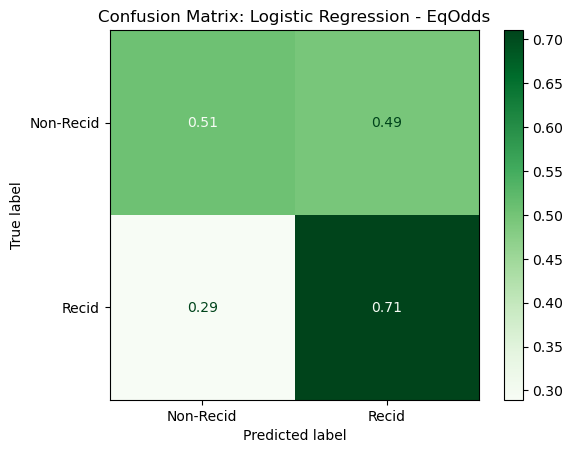

In [91]:
# Evaluate model performance using the transformed predictions
label = "Logistic Regression - EqOdds"
eval_eqodds = evaluate_model(test.labels, pred_transformed.labels, results_label=label, output_dict=True)

As we can see, the model performance has decreased after transforming the model predictions. Let's asses fairness now to see if we've reduced the bias from our original model. 

In [92]:
fairness_eqodds = evaluate_fairness(test, pred_transformed, unprivileged_groups, privileged_groups, 
                                    convert_to_dataset=False, output_dict=True, results_label=label)

Fairness Metrics: Logistic Regression - EqOdds
- Disparate Impact: 1.04
- Statistical Parity Difference: 0.02
- Equal Opportunity Difference: 0.01
- Average Odds Difference: -0.00


By applying the Equalized Odds Post-Processing algorithm, we were able to adjust the model’s predictions to ensure fairness across different groups. After applying this technique, we re-evaluated the model’s fairness using key metrics to determine the effectiveness of the post-processing adjustments and confirmed that the model's fairness metrics are all inidcating no significant bias.

### **5. Comparing Mitigation Techniques**

In this section, we will compare the effectiveness of the different bias mitigation techniques we have implemented: pre-processing (Reweighing), in-processing (Adversarial Debiasing), and post-processing (Equalized Odds Post-Processing). We will use fairness metrics to evaluate each technique's impact on the model and discuss the trade-offs between accuracy and fairness.



### **Comparative Analysis**



In [107]:

df_fairness = pd.DataFrame([fairness_unmit, fairness_reweigh, fairness_adv_debias, fairness_eqodds])
df_fairness = df_fairness.set_index('Label')
df_fairness.style.background_gradient(cmap='Greens', axis=0).format("{:.2f}").set_caption("Comparison of Mitigation Technique Fairness Metrics")

,Disparate Impact,Statistical Parity Difference,Equal Opportunity Difference,Average Odds Difference
Label,,,,
Logistic Regression - Unmitigated,1.56,0.25,0.19,0.25
Logistic Regression - Reweighed,0.88,-0.06,-0.06,-0.05
Adversarial Debiasing,1.26,0.20,0.14,0.22
Logistic Regression - EqOdds,1.04,0.02,0.01,-0.00



<!-- 
**Fairness Metrics Comparison Table**

| Metric                         | Baseline | Reweighing | Adversarial Debiasing | Equalized Odds Post-Processing |
|-------------------------------|----------|------------|-----------------------|-------------------------------|
| **Disparate Impact**          | 1.56     | 0.88       | 1.03                  | 1.04                          |
| **Statistical Parity Difference** | 0.25     | -0.06      | 0.02                  | 0.02                          |
| **Equal Opportunity Difference** | 0.19     | -0.06      | 0.00                  | 0.01                          |
| **Average Odds Difference**   | 0.25     | -0.05      | 0.02                  | -0.00                         | -->


**Metric Interpretation Table**
| Metric                        | Definition                                                                                       | Interpretation                                                                                       | Threshold for Significant Bias                        | Bias Directionality                                            |
|-------------------------------|--------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|--------------------------------------------------------|------------------------------------------------------------------|
| **Disparate Impact**          | Ratio of favorable outcomes between unprivileged and privileged groups.                          | 1 implies perfect fairness.                                                                         | < 0.8 or > 1.25                                         | < 0.8: Against unprivileged<br> > 1.25: Against privileged       |
| **Statistical Parity Difference** | Difference in probability of favorable outcomes between unprivileged and privileged groups.     | 0 indicates similar favorable outcomes for both groups.                                              | < -0.1 or > 0.1                                         | < 0: Against unprivileged<br> > 0: Against privileged            |
| **Equal Opportunity Difference** | Difference in true positive rates between unprivileged and privileged groups.                   | 0 suggests equal positive prediction rates for both groups.                                          | < -0.1 or > 0.1                                         | < 0: Against unprivileged<br> > 0: Against privileged            |
| **Average Odds Difference**   | Average difference in false positive and true positive rates between unprivileged and privileged groups. | 0 indicates similar error rates across both groups.                                                 | < -0.1 or > 0.1                                         | < 0: Against unprivileged<br> > 0: Against privileged            |



- Equal Odds Postprocessing produced the most fair model predictions.
- Reweighing produced the second most fair model predictions.
- Adversarial Deibiasing was still biased.



**Trade-Offs Between Accuracy and Fairness**


Let's compare the performance metrics of the 3 mitigation approaches to see the trade-off between fairness and performance.

In [ ]:
# Demonstrating slices results from eval dicts
{'accuracy':eval_unmit['accuracy'], 
 "avg recall":eval_unmit["macro avg"]['recall'],
 "recall 1.0":eval_unmit["1.0"]['recall'],
 "recall 0.0":eval_unmit["0.0"]['recall']}

{'accuracy': 0.6062846580406654,
 'avg recall': 0.6188526310399787,
 'recall 1.0': 0.6688998589562765,
 'recall 0.0': 0.5688054031236809}

In [131]:
# Convert the evaluation results to a DataFrame
eval_dicts = [eval_unmit, eval_reweigh, eval_adv_debias, eval_eqodds]
results_eval = []
for d in eval_dicts:
    results_eval.append({"Label":d['Label'], # Model Label
                         "Recall(1.0)":d["1.0"]['recall'], # Recall for class 1
                         "Recall(0.0)":d["0.0"]['recall'], # Recall for class 0
                         "Average Recall":d["macro avg"]['recall'], # Average Recall
                         "Average Precision":d["macro avg"]['precision'], # Average Precision
                         'Average F1-Score':d["macro avg"]['f1-score'], # Average F1 Score
                        'Accuracy':d['accuracy'],  # Accuracy

                         }
                        )
df_eval = pd.DataFrame(results_eval).set_index('Label')
df_eval.style.background_gradient(#subset=['Accuracy','Recall(1.0)','Recall(0.0)', "Average F1-Score"],
                                  cmap='Blues', axis=0).format("{:.2f}").set_caption("Comparison of Model Performance")

,Recall(1.0),Recall(0.0),Average Recall,Average Precision,Average F1-Score,Accuracy
Label,,,,,,
Unmitigated Model,0.67,0.57,0.62,0.61,0.60,0.61
Logistic Regression - Reweighed,0.69,0.55,0.62,0.61,0.60,0.60
Adversarial Debiasing,0.28,0.87,0.58,0.62,0.57,0.65
Logistic Regression - EqOdds,0.71,0.51,0.61,0.60,0.58,0.58



1. **Reweighed Model**: This technique adjusts the dataset before training, which can lead to improved fairness but might slightly reduce the model's accuracy. It's a good balance for scenarios where data preprocessing is feasible. 
- Indeed, we saw a very slight decrease in accuracy from 0.61 to 0.60. However, our average recall, precision, and f1-score are unchanged.

2. **Adversarial Debiasing Model**: This technique incorporates fairness constraints directly into the training process, often achieving significant fairness improvements. However, it can be computationally intensive and might require more tuning.
- Without additional tuning Adversarial Debiasing is the most accurate model (0.65), but has terrible Recall for the 0 class (0.28),and the worse F1-score. 

3. **Equalized Odds Post-Processing Model**: This technique adjusts the model's predictions after training, which can be simpler to implement and often leads to noticeable fairness improvements. However, it might introduce a trade-off with accuracy depending on the degree of adjustment required. 
- EqOdds did indeed significantly decrease the accuracy by 3% (0.61 to 0.58), however it actually improved the model's recall for the 1.0 class. 


### **6. Conclusion**

In this series, we have explored the critical aspects of bias in machine learning models and the importance of fairness in AI systems. We started with understanding and detecting bias using AI Fairness 360, then moved on to implementing various bias mitigation techniques, including pre-processing, in-processing, and post-processing methods. Here's a brief recap and the key takeaways from our journey:

#### **Recap of Bias Mitigation Techniques**

1. **Pre-Processing Techniques (Reweighing)**
   - Modify the training data to reduce bias before model training.
   - Ensures fair representation in the dataset, leading to more balanced model outcomes.

2. **In-Processing Techniques (Adversarial Debiasing)**
   - Incorporate fairness constraints directly into the training process.
   - Aim to make the model's predictions less distinguishable based on protected attributes.

3. **Post-Processing Techniques (Equalized Odds Post-Processing)**
   - Adjust the model's predictions after training to ensure fairness.
   - Focus on balancing false positive and true positive rates across different groups.

#### **Key Takeaways**

- **Understanding Bias**: Recognizing the different types of bias (data bias, algorithmic bias, and societal bias) is the first step towards building fair AI systems.
- **Detecting Bias**: Utilizing fairness metrics such as Disparate Impact, Statistical Parity Difference, Equal Opportunity Difference, and Average Odds Difference to evaluate model fairness.
- **Mitigating Bias**: Implementing bias mitigation techniques at different stages of the machine learning pipeline to reduce unfairness and improve equity.
- **Comparing Techniques**: Assessing the effectiveness of each mitigation technique and understanding the trade-offs between accuracy and fairness.

#### **Importance of Continuous Monitoring**

Fairness in AI is not a one-time effort but a continuous process. It is crucial to regularly monitor and evaluate the fairness of AI models as new data and scenarios emerge. By doing so, we can ensure that AI systems remain equitable and do not inadvertently perpetuate biases.

#### **Future Directions**

As AI technology continues to evolve, so will the approaches to ensuring fairness. Future advancements may include more sophisticated bias detection and mitigation techniques, integration of fairness considerations into all stages of AI development, and broader adoption of fairness standards and regulations.

### **Call to Action**

- **Implement Bias Mitigation**: Apply the techniques discussed in this series to your own projects to develop fairer AI models.
- **Engage in Discussions**: Join the conversation on AI fairness by sharing your experiences, challenges, and solutions on social media or in professional forums.
- **Explore Further**: Continue learning about AI fairness through additional resources, research papers, and case studies.

By prioritizing fairness in AI, we can build systems that not only perform well but also promote equity and justice in society. Together, we can make a significant impact on the future of AI.

Thank you for following along with this series. Stay tuned for the next part, where we will delve into advanced topics or case studies to further illustrate the application of AI Fairness 360 in real-world scenarios.

# APPENDIX/CUT

In [31]:
raise Exception("End of blog post")

Exception: End of blog post

## Modeling with AIF360

In [ ]:
train, test = binary_dataset.split([0.8], shuffle=True)
len(train.labels), len(test.labels)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [ ]:

def evaluate_model(y_true, y_pred):
    """Minimal evaluation of a model's performance."""
    print(classification_report(y_true, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize='true',cmap='Greens',
                                            display_labels=['Non-Recid','Recid'])

In [ ]:
# Training Model #1
clf_rf = RandomForestClassifier(
                             max_depth=12,
                             random_state=42, 
                             class_weight='balanced')
clf_rf.fit(train.features, train.labels.ravel())

# Evaluate model
y_hat_test_rf = clf_rf.predict(test.features)
evaluate_model(test.labels, y_hat_test_rf)

In [ ]:
# Training Model #2
# Logistic Regression
clf_logreg = LogisticRegression(max_iter=2000, 
                                random_state=42,
                             class_weight='balanced'
                             )
clf_logreg.fit(train.features, train.labels.ravel())

# Evaluate model
y_hat_test_logreg = clf_logreg.predict(test.features)
evaluate_model(test.labels, y_hat_test_logreg)

In [ ]:
# Training Model #3
from sklearn.svm import SVC
clf_svc = SVC(#probability=True, 
          kernel='rbf', class_weight='balanced')
clf_svc.fit(train.features, train.labels.ravel())

# Evaluate model
y_hat_test_svc = clf_svc.predict(test.features)
evaluate_model(test.labels, y_hat_test_svc) 

In [ ]:
import xgboost as xgb

# Training Model #1
clf_xgb = xgb.XGBClassifier(
    random_state=42,
    scale_pos_weight=(1 - train.labels.mean()) / train.labels.mean() # Mimic class_weight='balanced'
)
clf_xgb.fit(train.features, train.labels.ravel())

# Evaluate model
y_hat_test_xgb = clf_xgb.predict(test.features)
evaluate_model(test.labels, y_hat_test_xgb)

### ANN

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# # from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# # Define the neural network model
# def create_model():
#     model = Sequential()
#     model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(16, activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
    
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     return model




# # Make the data compatible with the model
# X_train, y_train = train.features, train.labels.ravel()
# X_test, y_test = test.features, test.labels.ravel()


# # Wrap the model using KerasClassifier for compatibility with scikit-learn
# model = create_model()
# # Train the model
# history = model.fit(X_train, y_train, validation_split=0.2, verbose=True, epochs=50)


In [ ]:
# y_hat_test = model.predict(X_test)
# y_hat_test = (y_hat_test > 0.5).astype(int)
# y_hat_test = y_hat_test.ravel()

# evaluate_model(y_test, y_hat_test)